# This notebook exemplifies the calculation of the reduction to Pole by using the *classical equivalent layer* approach.

In [1]:
# Import all python modules
import numpy
from matplotlib import pyplot

In [2]:
# Import some developed modules
from codes.prism import prism_tf
from codes.sphere import sphere_tfa
from codes.grids import regular_grid
from codes.equivalentlayer import layer, mat_mag, mat_grav

In [3]:
# Data shape
n = 100
shape = (n, n)

In [4]:
xo, yo, zo = regular_grid((-2000., 2000., -2000., 2000.), shape, -200.)

In [5]:
inc = 30.
dec = 50.
incs = 45.
decs = 42.

In [6]:
#tfa = sphere_tfa(xo, yo, zo, (0., 0., 200., 150., 1.), inc, dec, incs, decs)
tfp = prism_tf(xo, yo, zo, (-300., 150., -100., 280., 100., 750., 1.215), inc, dec, incs, decs)

In [7]:
# Statistical module
from codes.auxiliars import addnoise
from codes.statistical import analysis

In [8]:
print 'Analysing total field data:'
_ = analysis(tfp)

Analysing total field data:
Minimum:    -77.5655
Maximum:    21.4167
Mean value: -0.7258
Variation:  98.9822


In [9]:
#tfa = addnoise(tfa, 2., 0.025})
tf = addnoise(tfp, 2., 0.1)

In [10]:
# Create the grid results
X = xo.reshape(shape)
Y = yo.reshape(shape)
Z = zo.reshape(shape)
TF = tfp.reshape(shape)

#### Creating the layer

In [11]:
layer = layer((-2000., 2000., -2000., 2000.), shape, 500.)

In [12]:
mat = mat_mag(xo, yo, zo, layer, inc, dec, incs, decs)

In [15]:
T = numpy.abs(numpy.matrix.trace(mat))
print 'Trace of matrix:', T

Trace of matrix: 0.00199922825477


In [16]:
I = numpy.identity(n**2)

In [29]:
vec = numpy.linalg.solve(numpy.dot(mat.T, mat) + (T**4)*I, numpy.dot(mat.T, tfp))

In [30]:
predicted = numpy.dot(mat, vec)

In [31]:
from codes.auxiliars import residual

In [32]:
res, mean, deviation = residual(tfp, predicted)

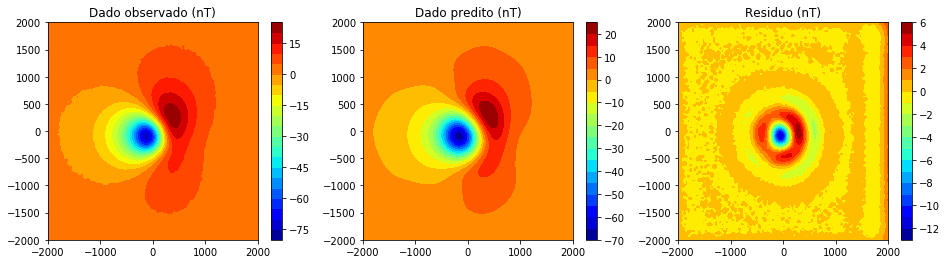

In [35]:
pyplot.figure(figsize=(16, 4))

pyplot.subplot(1, 3, 1)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), tfp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('Dado observado (nT)')
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), predicted.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('Dado predito (nT)')
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), res.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('Residuo (nT)')
pyplot.colorbar()

pyplot.show()

### Applying the reduction to Pole by using Equivalent Layer

In [36]:
inc_polo = 90.
dec_polo = 0.

In [38]:
# Calculo da RTP verdadeira
#true_rtp = sphere_tfa(xo, yo, zo, (0., 0., 200., 150., 1.), inc_polo, dec_polo)
true_rtp = prism_tf(xo, yo, zo, (-300., 150., -100., 280., 100., 750., 1.215), inc_polo, dec_polo)

In [39]:
# Calculo da RTP via Fourier
from codes.filtering import reduction

In [40]:
rtp = reduction(X, Y, TF, inc, dec, incs, decs)

codes/auxiliars.py:207: RuntimeWarning: divide by zero encountered in divide
  theta = z + ((x*u + y*v)/k)*1j
codes/auxiliars.py:207: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [41]:
# Calculo da RTP via camada equivalente
layer_rtp = mat_mag(xo, yo, zo, layer, inc_polo, dec_polo, inc_polo, dec_polo)

In [42]:
tf_rtp = numpy.dot(layer_rtp, predicted)

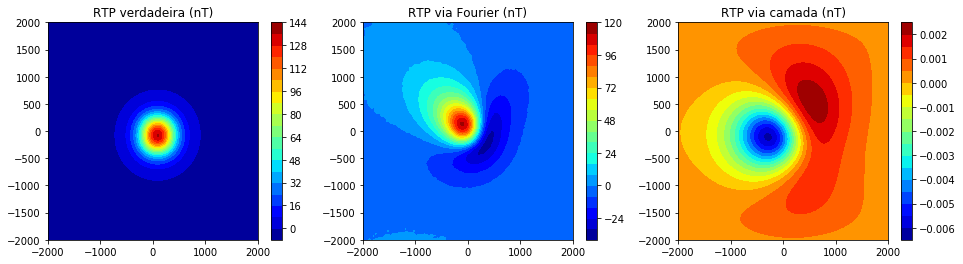

In [51]:
pyplot.figure(figsize=(16, 4))

pyplot.subplot(1, 3, 1)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), true_rtp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('RTP verdadeira (nT)')
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), rtp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('RTP via Fourier (nT)')
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), tf_rtp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('RTP via camada (nT)')
pyplot.colorbar()

pyplot.show()